### Visualize the NTP performance at different model sparsity settings

In [35]:
import matplotlib.pyplot as plt
import re

In [33]:
datasets = ["stl", "cifar10"]
file_directory = "../../logs/vgg11/"

In [34]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [36]:
import numpy as np

def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                if data_volume not in results:
                    results[data_volume] = [accuracy]
                else:
                    results[data_volume].append(accuracy)
        for key in results:
            results[key] = np.array(results[key])
        return results

In [47]:
source = 'cifar10'
target = 'stl'
seed = 3
sparsity = [0.5, 0.8, 0.9, 0.95, 0.99]

sparsity_results = {}
for s in sparsity:
    org_path = file_directory + f"lda/{seed}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path)
    print(org_dic)
    sparsity_results[s] = org_dic


{5.0: array([0.1375  , 0.13275 , 0.118125, 0.168875]), 10.0: array([0.11775 , 0.12175 , 0.116875, 0.123625]), 25.0: array([0.1555  , 0.16375 , 0.192375, 0.17525 ]), 40.0: array([0.194375, 0.190625, 0.18275 , 0.18075 ]), 50.0: array([0.223125, 0.22375 , 0.204   , 0.193875]), 250.0: array([0.431875, 0.41475 , 0.434   , 0.437   ]), 500.0: array([0.583125, 0.588   , 0.57425 , 0.578875]), 1000.0: array([0.618625, 0.618   , 0.614625, 0.606   ]), 2500.0: array([0.656  , 0.66125, 0.665  , 0.65975]), 5000.0: array([0.68975, 0.689  , 0.6965 , 0.69425])}
{5.0: array([0.154375, 0.159875, 0.118875, 0.15625 ]), 10.0: array([0.140625, 0.13875 , 0.151625, 0.124   ]), 25.0: array([0.235125, 0.248625, 0.185875, 0.192875]), 40.0: array([0.21925 , 0.216625, 0.234875, 0.18225 ]), 50.0: array([0.245625, 0.24325 , 0.243375, 0.22275 ]), 250.0: array([0.36525 , 0.358875, 0.39975 , 0.3975  ]), 500.0: array([0.4995  , 0.484875, 0.4585  , 0.505375]), 1000.0: array([0.576625, 0.5685  , 0.547125, 0.54    ]), 2500.0

dict_values([array([0.4581]), array([0.6372]), array([0.8885]), array([0.9283]), array([0.9456]), array([0.9701]), array([0.9782]), array([0.9859]), array([0.9912]), array([0.9902])])
dict_values([array([0.2566]), array([0.1211]), array([0.8434]), array([0.4894]), array([0.9064]), array([0.9532]), array([0.9703]), array([0.9764]), array([0.984]), array([0.9874])])
dict_values([array([0.3513]), array([0.3344]), array([0.9203]), array([0.9173]), array([0.9285]), array([0.9701]), array([0.9767]), array([0.983]), array([0.9892]), array([0.9922])])
dict_values([array([0.1125, 0.1122]), array([0.1124, 0.112 ]), array([0.245 , 0.1947]), array([0.8521, 0.9167]), array([0.1091, 0.1048]), array([0.972 , 0.9719]), array([0.9732, 0.9748]), array([0.9739, 0.9777]), array([0.9862, 0.9853]), array([0.9925, 0.9909])])
dict_values([array([0.1174]), array([0.1169]), array([0.5876]), array([0.791]), array([0.8467]), array([0.9467]), array([0.959]), array([0.9697]), array([0.9771]), array([0.9849])])


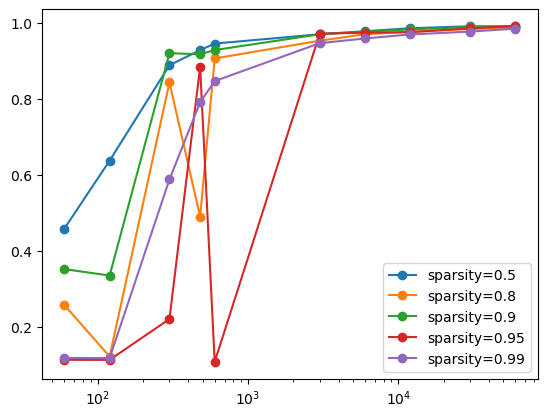

In [45]:
for i, s in enumerate(sparsity_results.keys()):
    dic = sparsity_results[s]
    # std = np.std(list(dic.values()), axis=1)
    # print(std)
    print(dic.values())
    mean = np.mean(list(dic.values()), axis=1)
    # Set color mapping
    cmap = plt.get_cmap('tab10')
    plt.plot(list(dic.keys()), mean, label=f"sparsity={s}", color=cmap(i), marker="o")
    # Draw the std using the bars
    # plt.errorbar(list(dic.keys()), mean, yerr=std, fmt='.', color=cmap(i))

    
# log scale
plt.xscale('log')
plt.legend()

In [30]:
# Read the curve for local training 
local_path = file_directory + "local/" + target + ".log"
local_dic = read_file(local_path)

In [27]:
# Read the curve for local training 
transfer_path = file_directory + "transfer/0/" + source + "-" + target + ".log"
transfer_path = read_file(transfer_path)

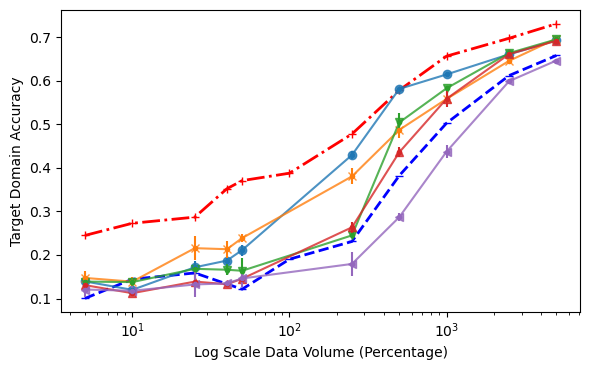

In [31]:
plt.figure(figsize=(6, 4))  # Increase figure size for better clarity
# Plot the curve for local training
std = np.std(list(local_dic.values()), axis=1)
mean = np.mean(list(local_dic.values()), axis=1)
plt.plot(list(local_dic.keys()), mean, label="From Scratch", color="blue", marker="_", linestyle="--", lw=2)

# Plot the curve for transfer learning
std = np.std(list(transfer_path.values()), axis=1)
mean = np.mean(list(transfer_path.values()), axis=1)
plt.plot(list(transfer_path.keys()), mean, label="Transfer", color="red", marker="+", linestyle="-.", lw=2)


# Create a color map once, to be used for all the lines
cmap = plt.get_cmap('tab10')
markers = ['o', 'x', 'v', '^', '<', '>', 'h', 'H', 'D', 'P', '*', '+', '|', '_']
# Plot all the sparsity results
for i, s in enumerate(sparsity_results.keys()):
    dic = sparsity_results[s]
    std = np.std(list(dic.values()), axis=1)
    mean = np.mean(list(dic.values()), axis=1)
    label = f"{s}"  # Shorten label here if necessary
    plt.plot(list(dic.keys()), mean, label=label, color=cmap(i), marker=markers[i], alpha=0.8)
    plt.errorbar(list(dic.keys()), mean, yerr=std, fmt='.', color=cmap(i), alpha=1)


# Apply log scale for x-axis
plt.xscale('log')

# Adjust legend positioning and add title
# legend_title = "Model Sparsity"
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize='medium', title=legend_title, framealpha=0.8)

plt.xlabel("Log Scale Data Volume (Percentage)")
plt.ylabel("Target Domain Accuracy")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the legend above the plot
# Save the plot to a svg 
plt.savefig("../../imgs/sparsity-vgg11-cifar10-stl.svg")
plt.show()


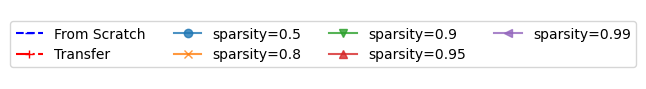

In [19]:
# Draw the legend separately
plt.figure(figsize=(5, 1))  # Increase figure size for better clarity
# Draw the legend separately
plt.plot([], [], color='blue', marker="_", linestyle="--", label="From Scratch")
plt.plot([], [], color='red', marker="+", linestyle="-.", label="Transfer")
for i, s in enumerate(sparsity_results.keys()):
    label = f"sparsity={s}"  # Shorten label here if necessary
    plt.plot([], [], label=label, color=cmap(i), marker=markers[i], alpha=0.8)
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5), ncol=4, fontsize='medium', framealpha=0.8)
plt.axis('off')
plt.tight_layout()
plt.savefig("../../imgs/sparsity-vgg-cifar10-stl-legend.svg", bbox_inches='tight', pad_inches=0.1, transparent=True)